# 스키마 

## 코드 정리가 어려워서 스키마를 올립니다.

사용할 파일
- df_fac.csv
- df_fac_coin.csv
- df_fac_pharm.csv
- df_fac_store.csv

사용할 라이브러리

import pandas as pd
import numpy as np
from glob import glob

from urllib.request import urlopen
import json

import folium

마크다운에서 15, 16 시각화 부분으로 바로 보시면 됩니다.

# 라이브러리 불러오기 및 데이터 불러오기 

In [1]:
import pandas as pd
import numpy as np
from glob import glob

from urllib.request import urlopen
import json

# 지도 시각화를 위한 라이브러리
import folium

# 위도경도 변환을 위한 라이브러리
import pyproj


In [2]:
file = glob("*")
file = sorted(file)
file

['Untitled.ipynb',
 'code_new.xlsx',
 'df_fac.csv',
 'df_fac_coin.csv',
 'df_fac_pharm.csv',
 'df_fac_store.csv',
 'dong_code.csv',
 'eStatutory_dong_code.csv',
 'home_fac.ipynb',
 'seoul_store.csv',
 '법정동코드 조회자료.xls',
 '서울시세탁소정보.csv',
 '서울시약국정보.csv',
 '서울시휴게시설정보.csv',
 '전체데이터프레임.csv',
 '통합 파일',
 '통합2']

In [3]:
# 세탁소 정보 불러오기
coin = pd.read_csv("서울시세탁소정보.csv", encoding = "cp949")
coin

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,조건부허가신고사유,조건부허가시작일자,조건부허가종료일자,건물소유구분명,세탁기수,여성종사자수,남성종사자수,회수건조수,침대수,다중이용업소여부
0,3150000,3150000-205-1987-01718,19870922,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3160000,3160000-205-2011-00007,20110826,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3210000,3210000-205-2008-00021,20080819,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3210000,3210000-205-1987-01754,19870921,NaN,3,폐업,2,폐업,20220124,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3160000,3160000-205-2005-00005,20050318,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15151,3160000,3160000-205-1987-01808,19870506,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15152,3210000,3210000-205-2005-00010,20050613,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15153,3100000,3100000-205-1987-01340,19870619,NaN,3,폐업,2,폐업,20220630,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15154,3100000,3100000-205-2013-00003,20130613,NaN,3,폐업,2,폐업,20220715,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 약국 정보 불러오기
pharm = pd.read_csv("서울시약국정보.csv", encoding = "cp949")
pharm.head(2)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),약국영업면적,지정일자
0,3010000,PHMD119803010033084000094,19800303,NaN,3,폐업,3,폐업,19801021,NaN,...,NaN,충남약국,20090212092610,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,21.76,19800303.0
1,3010000,PHMD119863010033084000007,19861120,NaN,3,폐업,3,폐업,19870409,NaN,...,NaN,이약국,20090203101112,I,2018-08-31 23:59:59.0,NaN,NaN,NaN,18.30,19861120.0


In [5]:
# 편의점 정보 불러오기
store = pd.read_csv("seoul_store.csv")
store.head(2)

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_57113/1337915206.py:2: DtypeWarning: Columns (13,36,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  store = pd.read_csv("seoul_store.csv")


,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,3130000,3130000-104-2022-00101,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3120000,3120000-104-2023-00006,20230110,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 전처리

## 코인세탁소 정보 전처리

In [6]:
# 폐업처리 사업장 제거
coin = coin.loc[~coin["영업상태명"].str.contains("폐업"), :]

In [7]:
# 사업장명 unique값 확인
# 유니크값이 너무 많아서 확인 불가
coin["사업장명"].unique()

array(['화곡세탁소', '백조', '백양세탁', ..., '기름이 맑은세탁', '꽃길', '양재전자크리닝'],
      dtype=object)

In [8]:
# 사업자명 컬럼으로 변경
# 무인|24|코인|빨래방|세탁방|셀프|유니룩스|크린|워시|월드씨앤에프|월드크리닝
coin = coin.loc[coin["사업장명"].str.contains("무인|24|코인|빨래방|세탁방|셀프|유니룩스|크린|워시|월드씨앤에프|월드크리닝")]
coin

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,조건부허가신고사유,조건부허가시작일자,조건부허가종료일자,건물소유구분명,세탁기수,여성종사자수,남성종사자수,회수건조수,침대수,다중이용업소여부
44,3040000,3040000-205-2022-00002,20220414,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,3160000,3160000-205-1998-02087,19980828,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,3060000,3060000-205-2019-00005,20191219,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,3190000,3190000-205-2008-00007,20080813,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,3090000,3090000-205-2010-00009,20101116,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14440,3240000,3240000-205-2012-00002,20120305,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,임대,2.0,NaN,NaN,0.0,0.0,N
14442,3240000,3240000-205-2004-00022,20041013,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
14447,3240000,3240000-205-2011-00005,20110629,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15073,3240000,3240000-205-2011-00008,20111207,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# 필요한 컬럼만 추출
coin = coin[["사업장명", "지번주소","좌표정보(X)","좌표정보(Y)"]].reset_index(drop = True)
coin

,사업장명,지번주소,좌표정보(X),좌표정보(Y)
0,마마운동화이불빨래방 중곡점,서울특별시 광진구 중곡동 80-24,207768.461525,450541.996110
1,그린셀프크리닝,서울특별시 구로구 개봉동 60-70,186184.211193,444289.107238
2,마마운동화빨래방,서울특별시 중랑구 묵동 300-1 상록수한의원,206917.833161,457023.152884
3,아이크린세탁전문점,서울특별시 동작구 상도동 436 래미안상도3차아파트,195766.388348,444020.397472
4,주식회사 크린토피아 도봉,서울특별시 도봉구 창동 630-24 제1층,203058.014515,460009.769693
...,...,...,...,...
266,동명크린,서울특별시 강동구 천호동 450-23 1층,211492.872614,448344.663122
267,크린나이스 강동점,서울특별시 강동구 천호동 163-14번지 우정에쉐르 1층 104호,211707.791367,448419.291729
268,월드크린,서울특별시 강동구 천호동 414 두산위브106호,211154.188038,448580.889486
269,크린에이드,서울특별시 강동구 길동 99-4,212952.113997,448698.829639


In [10]:
# 널값 확인
coin.isnull().sum()

사업장명       0
지번주소       1
좌표정보(X)    1
좌표정보(Y)    1
dtype: int64

In [11]:
# 널값 제거
coin = coin.dropna()
coin

,사업장명,지번주소,좌표정보(X),좌표정보(Y)
0,마마운동화이불빨래방 중곡점,서울특별시 광진구 중곡동 80-24,207768.461525,450541.996110
1,그린셀프크리닝,서울특별시 구로구 개봉동 60-70,186184.211193,444289.107238
2,마마운동화빨래방,서울특별시 중랑구 묵동 300-1 상록수한의원,206917.833161,457023.152884
3,아이크린세탁전문점,서울특별시 동작구 상도동 436 래미안상도3차아파트,195766.388348,444020.397472
4,주식회사 크린토피아 도봉,서울특별시 도봉구 창동 630-24 제1층,203058.014515,460009.769693
...,...,...,...,...
266,동명크린,서울특별시 강동구 천호동 450-23 1층,211492.872614,448344.663122
267,크린나이스 강동점,서울특별시 강동구 천호동 163-14번지 우정에쉐르 1층 104호,211707.791367,448419.291729
268,월드크린,서울특별시 강동구 천호동 414 두산위브106호,211154.188038,448580.889486
269,크린에이드,서울특별시 강동구 길동 99-4,212952.113997,448698.829639


In [12]:
# 널값 확인
coin.isnull().sum()

사업장명       0
지번주소       0
좌표정보(X)    0
좌표정보(Y)    0
dtype: int64

In [13]:
# 자치구 컬럼 만들기
coin_ad_list = coin["지번주소"]
coin_gu = [i.split(" ")[1].strip() for  i in list(coin_ad_list)]

coin["자치구"] =coin_gu

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_57113/4226412618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin["자치구"] =coin_gu


In [14]:
# 동 컬럼 만들기
coin_ad_list = coin["지번주소"]
coin_dong = [i.split(" ")[2].strip() for  i in list(coin_ad_list)]

coin["동"] =coin_dong

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_57113/1638802732.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coin["동"] =coin_dong


In [15]:
# 컬럼명 통일을 위한 컬럼명 재설정

coin = coin[["사업장명","자치구", "동", "좌표정보(X)","좌표정보(Y)"]]
coin.columns = ["사업장명","자치구", "동", "X","Y"]

In [16]:
coin["업태구분명"] = "코인세탁소"
coin

,사업장명,자치구,동,X,Y,업태구분명
0,마마운동화이불빨래방 중곡점,광진구,중곡동,207768.461525,450541.996110,코인세탁소
1,그린셀프크리닝,구로구,개봉동,186184.211193,444289.107238,코인세탁소
2,마마운동화빨래방,중랑구,묵동,206917.833161,457023.152884,코인세탁소
3,아이크린세탁전문점,동작구,상도동,195766.388348,444020.397472,코인세탁소
4,주식회사 크린토피아 도봉,도봉구,창동,203058.014515,460009.769693,코인세탁소
...,...,...,...,...,...,...
266,동명크린,강동구,천호동,211492.872614,448344.663122,코인세탁소
267,크린나이스 강동점,강동구,천호동,211707.791367,448419.291729,코인세탁소
268,월드크린,강동구,천호동,211154.188038,448580.889486,코인세탁소
269,크린에이드,강동구,길동,212952.113997,448698.829639,코인세탁소


## 약국 정보 전처리

In [17]:
# 페업처리 사업자 제거
pharm = pharm.loc[~pharm["영업상태명"].str.contains("폐업"), :]
pharm.head(2)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),약국영업면적,지정일자
2,3060000,PHMD120223060034084000006,20221017,NaN,1,영업/정상,13,영업중,NaN,NaN,...,2135.0,연세파란약국,20221017160535,I,2021-10-30 23:09:00.0,NaN,206964.460714,453984.499778,NaN,NaN
3,3240000,PHMD120223240033084000019,20221017,NaN,1,영업/정상,13,영업중,NaN,NaN,...,5264.0,더조은약국,20221017134334,I,2021-10-30 23:09:00.0,NaN,211260.202995,449774.572648,NaN,NaN


In [18]:
# 사업장명 unique값 확인
# 유니크값이 너무 많아서 확인 불가
pharm["사업장명"].unique()

array(['연세파란약국', '더조은약국', '봄약국', ..., '새사랑약국', '유원당약국', '보문한약국'],
      dtype=object)

In [19]:
# 필요한 컬럼만 추출
pharm = pharm[["사업장명","지번주소","좌표정보(X)","좌표정보(Y)"]].reset_index(drop = True)
pharm

,사업장명,지번주소,좌표정보(X),좌표정보(Y)
0,연세파란약국,서울특별시 중랑구 면목동 179-23,206964.460714,453984.499778
1,더조은약국,서울특별시 강동구 암사동 501-4 암사동양덱스빌,211260.202995,449774.572648
2,봄약국,서울특별시 구로구 오류동 54-4 1층 103호,186112.599008,443739.583663
3,청담소망약국,서울특별시 강남구 청담동 44-13,203971.749611,446231.554563
4,참조은약국,서울특별시 서대문구 홍은동 9-128,195392.223419,455163.943729
...,...,...,...,...
5520,새사랑약국,서울특별시 동작구 흑석동 332 이랜드해가든,196587.030630,444939.455415
5521,맑은수약국,서울특별시 영등포구 신길동 4491번지 돈보스코청소년센터,192275.299731,443891.073399
5522,유원당약국,서울특별시 동대문구 제기동 1109-6,203264.091526,453073.831727
5523,보문한약국,서울특별시 동대문구 제기동 1140-32,203176.142556,453006.365627


In [20]:
# 널값 확인
pharm.isnull().sum()

사업장명         0
지번주소       345
좌표정보(X)     95
좌표정보(Y)     95
dtype: int64

In [21]:
# 널값 제거
pharm = pharm.dropna()
pharm

,사업장명,지번주소,좌표정보(X),좌표정보(Y)
0,연세파란약국,서울특별시 중랑구 면목동 179-23,206964.460714,453984.499778
1,더조은약국,서울특별시 강동구 암사동 501-4 암사동양덱스빌,211260.202995,449774.572648
2,봄약국,서울특별시 구로구 오류동 54-4 1층 103호,186112.599008,443739.583663
3,청담소망약국,서울특별시 강남구 청담동 44-13,203971.749611,446231.554563
4,참조은약국,서울특별시 서대문구 홍은동 9-128,195392.223419,455163.943729
...,...,...,...,...
5520,새사랑약국,서울특별시 동작구 흑석동 332 이랜드해가든,196587.030630,444939.455415
5521,맑은수약국,서울특별시 영등포구 신길동 4491번지 돈보스코청소년센터,192275.299731,443891.073399
5522,유원당약국,서울특별시 동대문구 제기동 1109-6,203264.091526,453073.831727
5523,보문한약국,서울특별시 동대문구 제기동 1140-32,203176.142556,453006.365627


In [22]:
pharm.isnull().sum()

사업장명       0
지번주소       0
좌표정보(X)    0
좌표정보(Y)    0
dtype: int64

In [23]:
# 자치구 컬럼 만들기
pharm_ad_list = pharm["지번주소"]
pharm_gu = [i.split(" ")[1].strip() for  i in list(pharm_ad_list)]

pharm["자치구"] =pharm_gu

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_57113/2323115811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pharm["자치구"] =pharm_gu


In [24]:
# 동 컬럼 만들기
lst = []
pharm_ad_list = list(pharm["지번주소"])
for i in pharm_ad_list :
    if len(i.split(" ")) < 3:
        i = i + " -"
        lst.append(i)
    elif len(i.split(" ")) >= 3:
        lst.append(i)

pharm_dong = [i.split(" ")[2] for  i in lst ]

pharm["동"] = pharm_dong

# 지번주소에 구까지만 나와있는 것이 2개 있다!!
# 그것을 제거해줘야하나?
# => 일단 제거 하는걸로


/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_57113/941346197.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pharm["동"] = pharm_dong


In [25]:
# 컬럼명 통일을 위한 컬럼명 재설정
pharm = pharm[["사업장명","자치구", "동","좌표정보(X)","좌표정보(Y)"]]
pharm.columns = ["사업장명","자치구", "동", "X","Y"]

In [26]:
pharm.head()

,사업장명,자치구,동,X,Y
0,연세파란약국,중랑구,면목동,206964.460714,453984.499778
1,더조은약국,강동구,암사동,211260.202995,449774.572648
2,봄약국,구로구,오류동,186112.599008,443739.583663
3,청담소망약국,강남구,청담동,203971.749611,446231.554563
4,참조은약국,서대문구,홍은동,195392.223419,455163.943729


In [27]:
pharm["업태구분명"] = "약국"
pharm

,사업장명,자치구,동,X,Y,업태구분명
0,연세파란약국,중랑구,면목동,206964.460714,453984.499778,약국
1,더조은약국,강동구,암사동,211260.202995,449774.572648,약국
2,봄약국,구로구,오류동,186112.599008,443739.583663,약국
3,청담소망약국,강남구,청담동,203971.749611,446231.554563,약국
4,참조은약국,서대문구,홍은동,195392.223419,455163.943729,약국
...,...,...,...,...,...,...
5520,새사랑약국,동작구,흑석동,196587.030630,444939.455415,약국
5521,맑은수약국,영등포구,신길동,192275.299731,443891.073399,약국
5522,유원당약국,동대문구,제기동,203264.091526,453073.831727,약국
5523,보문한약국,동대문구,제기동,203176.142556,453006.365627,약국


## 편의점 정보 전처리

In [28]:
# 페업처리 사업자 제거
store = store.loc[~store["영업상태명"].str.contains("폐업"), :]
store.head(2)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,3130000,3130000-104-2022-00101,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3120000,3120000-104-2023-00006,20230110,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# 업태구분명 편의점만 추출
store = store.loc[store["업태구분명"].str.contains("편의점"), :]
store

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
3,3230000,3230000-104-2022-00096,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3120000,3120000-104-2022-00061,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3110000,3110000-104-2022-00074,20220422,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35,3240000,3240000-104-2023-00028,2023-02-16,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,3050000,3050000-104-2022-00047,20220421,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121954,3170000,3170000-104-2023-00019,2023-02-13,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122018,3230000,3230000-104-2023-00038,2023-02-15,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122020,3060000,3060000-104-2023-00016,2023-02-15,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122029,3200000,3200000-104-2023-00024,2023-02-15,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# 필요한 컬럼만 추출
store = store[["사업장명","지번주소","좌표정보(X)","좌표정보(Y)","업태구분명"]].reset_index(drop = True)
store

,사업장명,지번주소,좌표정보(X),좌표정보(Y),업태구분명
0,씨유 송파올림픽점,서울특별시 송파구 방이동 89 올림픽선수기자촌아파트,211986.2972,446156.5298,편의점
1,지에스25 홍은중앙로점,서울특별시 서대문구 홍은동 9-307,195407.4183,455381.4803,편의점
2,미니스톱 은평우물골점,서울특별시 은평구 진관동 81 은평뉴타운 우물골,193202.9119,459204.6494,편의점
3,세븐일레븐 천호이편한점,서울특별시 강동구 천호동 335-8,210880.8738,449088.3890,편의점
4,이마트24 장안에이스점,서울특별시 동대문구 장안동 125-19,205919.4223,452644.1369,편의점
...,...,...,...,...,...
5867,지에스(GS25) 시흥웨스트점,서울특별시 금천구 시흥동 992-20 웨스트밸리,191117.3426,438941.7922,편의점
5868,씨유 제이제이 가락점,서울특별시 송파구 가락동 127-20,211060.8952,443441.7106,편의점
5869,씨유 면목대양점,서울특별시 중랑구 면목동 347-4,207123.4929,452675.3514,편의점
5870,GS25 관악휴먼시아점,서울특별시 관악구 신림동 1735-3 관악산휴먼시아,192795.4350,439787.7156,편의점


In [31]:
store.isnull().sum()

사업장명        0
지번주소        2
좌표정보(X)    87
좌표정보(Y)    87
업태구분명       0
dtype: int64

In [32]:
# 널값 제거
store = store.dropna()
store

,사업장명,지번주소,좌표정보(X),좌표정보(Y),업태구분명
0,씨유 송파올림픽점,서울특별시 송파구 방이동 89 올림픽선수기자촌아파트,211986.2972,446156.5298,편의점
1,지에스25 홍은중앙로점,서울특별시 서대문구 홍은동 9-307,195407.4183,455381.4803,편의점
2,미니스톱 은평우물골점,서울특별시 은평구 진관동 81 은평뉴타운 우물골,193202.9119,459204.6494,편의점
3,세븐일레븐 천호이편한점,서울특별시 강동구 천호동 335-8,210880.8738,449088.3890,편의점
4,이마트24 장안에이스점,서울특별시 동대문구 장안동 125-19,205919.4223,452644.1369,편의점
...,...,...,...,...,...
5867,지에스(GS25) 시흥웨스트점,서울특별시 금천구 시흥동 992-20 웨스트밸리,191117.3426,438941.7922,편의점
5868,씨유 제이제이 가락점,서울특별시 송파구 가락동 127-20,211060.8952,443441.7106,편의점
5869,씨유 면목대양점,서울특별시 중랑구 면목동 347-4,207123.4929,452675.3514,편의점
5870,GS25 관악휴먼시아점,서울특별시 관악구 신림동 1735-3 관악산휴먼시아,192795.4350,439787.7156,편의점


In [33]:
store.isnull().sum()

사업장명       0
지번주소       0
좌표정보(X)    0
좌표정보(Y)    0
업태구분명      0
dtype: int64

In [34]:
store.columns

Index(['사업장명', '지번주소', '좌표정보(X)', '좌표정보(Y)', '업태구분명'], dtype='object')

In [35]:
# 자치구 컬럼 만들기
store_ad_list = store["지번주소"]
store_gu = [i.split(" ")[1].strip() for  i in list(store_ad_list)]

# store["자치구"] = 
store["자치구"] =store_gu

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_57113/2682467728.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store["자치구"] =store_gu


In [36]:
# 동 컬럼 만들기
store_ad_list = store["지번주소"]
store_dong = [i.split(" ")[2].strip() for  i in list(store_ad_list)]

store["동"] =store_dong

/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_57113/4103312535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store["동"] =store_dong


In [37]:
# 컬럼명 통일을 위한 컬럼명 재설정

store = store[['사업장명', '자치구', "동", '좌표정보(X)', '좌표정보(Y)', '업태구분명']]
store.columns = ["사업장명",'자치구', "동", "X","Y", "업태구분명"]

In [38]:
store

,사업장명,자치구,동,X,Y,업태구분명
0,씨유 송파올림픽점,송파구,방이동,211986.2972,446156.5298,편의점
1,지에스25 홍은중앙로점,서대문구,홍은동,195407.4183,455381.4803,편의점
2,미니스톱 은평우물골점,은평구,진관동,193202.9119,459204.6494,편의점
3,세븐일레븐 천호이편한점,강동구,천호동,210880.8738,449088.3890,편의점
4,이마트24 장안에이스점,동대문구,장안동,205919.4223,452644.1369,편의점
...,...,...,...,...,...,...
5867,지에스(GS25) 시흥웨스트점,금천구,시흥동,191117.3426,438941.7922,편의점
5868,씨유 제이제이 가락점,송파구,가락동,211060.8952,443441.7106,편의점
5869,씨유 면목대양점,중랑구,면목동,207123.4929,452675.3514,편의점
5870,GS25 관악휴먼시아점,관악구,신림동,192795.4350,439787.7156,편의점


# 좌표 변경

## 코인세탁소, 약국, 편의점 데이터프레임 병합

In [39]:
df = pd.concat([coin, pharm, store], ignore_index = True )
df

,사업장명,자치구,동,X,Y,업태구분명
0,마마운동화이불빨래방 중곡점,광진구,중곡동,207768.461525,450541.996110,코인세탁소
1,그린셀프크리닝,구로구,개봉동,186184.211193,444289.107238,코인세탁소
2,마마운동화빨래방,중랑구,묵동,206917.833161,457023.152884,코인세탁소
3,아이크린세탁전문점,동작구,상도동,195766.388348,444020.397472,코인세탁소
4,주식회사 크린토피아 도봉,도봉구,창동,203058.014515,460009.769693,코인세탁소
...,...,...,...,...,...,...
11163,지에스(GS25) 시흥웨스트점,금천구,시흥동,191117.342600,438941.792200,편의점
11164,씨유 제이제이 가락점,송파구,가락동,211060.895200,443441.710600,편의점
11165,씨유 면목대양점,중랑구,면목동,207123.492900,452675.351400,편의점
11166,GS25 관악휴먼시아점,관악구,신림동,192795.435000,439787.715600,편의점


In [40]:
df.columns = ["사업장명","자치구", "동", "X","Y","업태구분명"]
df.head()
df.columns

Index(['사업장명', '자치구', '동', 'X', 'Y', '업태구분명'], dtype='object')

## TM 좌표계 -> 위경도좌표로 변경

In [41]:
## df의 좌표를 위경도로 바꾼다.
def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5179
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [42]:
# DataFrame -> NumPy Array 변환
coord = np.array(df[["X", "Y"]])
coord

array([[207768.46152512, 450541.99611009],
       [186184.21119323, 444289.10723828],
       [206917.83316062, 457023.15288352],
       ...,
       [207123.4929    , 452675.3514    ],
       [192795.435     , 439787.7156    ],
       [194287.0913    , 442965.1925    ]])

In [43]:
# 좌표계 정보 설정
p1_type = "epsg:2097"
p2_type = "epsg:4326"

# project_array() 함수 실행
result = project_array(coord, p1_type, p2_type)
result

/Users/o_jungii/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/o_jungii/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/qm/t7nj8jrn23q1bgrhrz17cyhh0000gn/T/ipykernel_57113/2152348726.py:11: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#

array([[127.08581749,  37.55711913],
       [126.84165613,  37.50070887],
       [127.07625113,  37.61552008],
       ...,
       [127.0785386 ,  37.57634556],
       [126.91646659,  37.46022697],
       [126.93330168,  37.48886662]])

In [44]:
df['X'] = result[:, 0]
df['Y'] = result[:, 1]

In [45]:
df.head()

,사업장명,자치구,동,X,Y,업태구분명
0,마마운동화이불빨래방 중곡점,광진구,중곡동,127.085817,37.557119,코인세탁소
1,그린셀프크리닝,구로구,개봉동,126.841656,37.500709,코인세탁소
2,마마운동화빨래방,중랑구,묵동,127.076251,37.615520,코인세탁소
3,아이크린세탁전문점,동작구,상도동,126.950022,37.498382,코인세탁소
4,주식회사 크린토피아 도봉,도봉구,창동,127.032546,37.642450,코인세탁소


# 주소 재설정
## 카카오API 활용

In [46]:
# library import
import pandas as pd
import requests 
import sys
import json
import datetime
from tqdm import trange

In [47]:
# kakao API 내부 함수
def json_request(url='', encoding='utf-8', success=None, error=lambda e: print('%s : %s' % (e, datetime.now()), file=sys.stderr)):
    headers = {'Authorization': 'KakaoAK {}'.format(APP_KEY)}
    resp = requests.get(url, headers=headers)
    # print('%s : success for request [%s]' % (datetime.now(), url))
    return resp.text


def reverse_geocode(longitude, latitude):
    # 파라미터 최적화하여 url 생성
    url = '%s?x=%s&y=%s' %(URL, longitude, latitude)
    # json request
    try:
        # print('try')
        json_req = json_request(url=url)
        json_data = json.loads(json_req)
        json_doc = json_data.get('documents')[0]
        json_gu = json_doc.get('region_2depth_name') #구단위
        json_dong = json_doc.get('region_3depth_name') #동단위(법정동)
        json_region = json_doc.get('region_type')
    except:
        # print('nan')
        json_gu = 'NaN'
        json_dong = 'NaN'
    return json_gu, json_dong, json_region

 
def get_address(x,y):
    gu = []
    json_gu, json_dong, json_region = reverse_geocode(x, y) 
    gu.append(json_gu)
    return gu # 전처리 함수에서 구단위 리스트 받아서 데이터프레임에 추가


def get_code(x,y):
    dong = []
    json_gu, json_dong, json_region = reverse_geocode(x, y) 
    dong.append(json_dong)
    return dong # 전처리 함수에서 동단위(법정동) 리스트 받아서 데이터프레임에 추가

def get_region(x,y):
    region = []
    json_gu, json_dong, json_region = reverse_geocode(x, y) 
    region.append(json_region)
    return  region

In [48]:

# APP_KEY에 본인 REST API KEY 넣기
APP_KEY = '1cefd4d1a5d79437d8e3a50208c819c2'
URL = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json'

# 아래의 df 에는 본인이 적용할 dataframe명 변수로 넣으면 됨
# 위도, 경도 매칭 중요 : X값(100대), Y값(30대)
# 함수 적용 전, X, Y 컬럼의 값들 string으로 변환부터 해줘야 적용됨

def get_district(df):
    for i in trange(len(df)): 
        x_crd = float(df.loc[i, ['X']])
        y_crd = float(df.loc[i, ['Y']])
        gu = get_address(x_crd, y_crd)
        dong = get_code(x_crd, y_crd)
        region = get_region(x_crd,y_crd)
        df.loc[i, ['자치구']] = gu
        df.loc[i, ['동']] = dong
        df.loc[i, ['동분류']] = region
    return df

In [49]:
df = get_district(df)
df

100%|█████████████████████████████████████| 11168/11168 [56:45<00:00,  3.28it/s]


,사업장명,자치구,동,X,Y,업태구분명,동분류
0,마마운동화이불빨래방 중곡점,광진구,중곡동,127.085817,37.557119,코인세탁소,B
1,그린셀프크리닝,구로구,개봉동,126.841656,37.500709,코인세탁소,B
2,마마운동화빨래방,중랑구,묵동,127.076251,37.615520,코인세탁소,B
3,아이크린세탁전문점,동작구,상도동,126.950022,37.498382,코인세탁소,B
4,주식회사 크린토피아 도봉,도봉구,창동,127.032546,37.642450,코인세탁소,B
...,...,...,...,...,...,...,...
11163,지에스(GS25) 시흥웨스트점,금천구,시흥동,126.897510,37.452590,편의점,B
11164,씨유 제이제이 가락점,송파구,가락동,127.122973,37.493113,편의점,B
11165,씨유 면목대양점,중랑구,면목동,127.078539,37.576346,편의점,B
11166,GS25 관악휴먼시아점,관악구,신림동,126.916467,37.460227,편의점,B


# 전체 데이터 프레임 저장!!!!! 
## df : "df_save.csv"

In [50]:
df["주소"] = df["자치구"] + df["동"]
df

,사업장명,자치구,동,X,Y,업태구분명,동분류,주소
0,마마운동화이불빨래방 중곡점,광진구,중곡동,127.085817,37.557119,코인세탁소,B,광진구중곡동
1,그린셀프크리닝,구로구,개봉동,126.841656,37.500709,코인세탁소,B,구로구개봉동
2,마마운동화빨래방,중랑구,묵동,127.076251,37.615520,코인세탁소,B,중랑구묵동
3,아이크린세탁전문점,동작구,상도동,126.950022,37.498382,코인세탁소,B,동작구상도동
4,주식회사 크린토피아 도봉,도봉구,창동,127.032546,37.642450,코인세탁소,B,도봉구창동
...,...,...,...,...,...,...,...,...
11163,지에스(GS25) 시흥웨스트점,금천구,시흥동,126.897510,37.452590,편의점,B,금천구시흥동
11164,씨유 제이제이 가락점,송파구,가락동,127.122973,37.493113,편의점,B,송파구가락동
11165,씨유 면목대양점,중랑구,면목동,127.078539,37.576346,편의점,B,중랑구면목동
11166,GS25 관악휴먼시아점,관악구,신림동,126.916467,37.460227,편의점,B,관악구신림동


In [51]:
# 동 갯수 확인 
df.describe(include ="O")  

,사업장명,자치구,동,업태구분명,동분류,주소
count,11168,11168,11168,11168,11168,11168
unique,9399,32,404,3,1,407
top,봄약국,강남구,서초동,편의점,B,서초구서초동
freq,20,994,304,5783,11168,304


In [70]:
df

,사업장명,자치구,동,X,Y,업태구분명,동분류,주소
0,마마운동화이불빨래방 중곡점,광진구,중곡동,127.085817,37.557119,코인세탁소,B,광진구중곡동
1,그린셀프크리닝,구로구,개봉동,126.841656,37.500709,코인세탁소,B,구로구개봉동
2,마마운동화빨래방,중랑구,묵동,127.076251,37.615520,코인세탁소,B,중랑구묵동
3,아이크린세탁전문점,동작구,상도동,126.950022,37.498382,코인세탁소,B,동작구상도동
4,주식회사 크린토피아 도봉,도봉구,창동,127.032546,37.642450,코인세탁소,B,도봉구창동
...,...,...,...,...,...,...,...,...
11163,지에스(GS25) 시흥웨스트점,금천구,시흥동,126.897510,37.452590,편의점,B,금천구시흥동
11164,씨유 제이제이 가락점,송파구,가락동,127.122973,37.493113,편의점,B,송파구가락동
11165,씨유 면목대양점,중랑구,면목동,127.078539,37.576346,편의점,B,중랑구면목동
11166,GS25 관악휴먼시아점,관악구,신림동,126.916467,37.460227,편의점,B,관악구신림동


In [137]:
# 혹시 모르니 저장
df.to_csv("df_save.csv")

사업장명     0
자치구      0
동        0
X        0
Y        0
업태구분명    0
동분류      0
주소       0
dtype: int64

# 편의시설별로 데이터프레임 분리
전체 데이터프레임 df에서 각 항목별로 분리
- df_coin
- df_pharm
- df_store

## df_coin

In [72]:
df_coin = df.loc[df["업태구분명"] == "코인세탁소", :]
df_coin.drop_duplicates()

,사업장명,자치구,동,X,Y,업태구분명,동분류,주소
0,마마운동화이불빨래방 중곡점,광진구,중곡동,127.085817,37.557119,코인세탁소,B,광진구중곡동
1,그린셀프크리닝,구로구,개봉동,126.841656,37.500709,코인세탁소,B,구로구개봉동
2,마마운동화빨래방,중랑구,묵동,127.076251,37.615520,코인세탁소,B,중랑구묵동
3,아이크린세탁전문점,동작구,상도동,126.950022,37.498382,코인세탁소,B,동작구상도동
4,주식회사 크린토피아 도봉,도봉구,창동,127.032546,37.642450,코인세탁소,B,도봉구창동
...,...,...,...,...,...,...,...,...
264,동명크린,강동구,성내동,127.127934,37.537283,코인세탁소,B,강동구성내동
265,크린나이스 강동점,강동구,천호동,127.130367,37.537952,코인세탁소,B,강동구천호동
266,월드크린,강동구,천호동,127.124106,37.539415,코인세탁소,B,강동구천호동
267,크린에이드,강동구,길동,127.144451,37.540455,코인세탁소,B,강동구길동


## df_pharm

In [140]:
df_pharm = df.loc[df["업태구분명"] == "약국", :]
df_pharm = df_pharm.drop_duplicates()
df_pharm

,사업장명,자치구,동,X,Y,업태구분명,동분류,주소
269,연세파란약국,중랑구,면목동,127.076751,37.588142,약국,B,중랑구면목동
270,더조은약국,강동구,암사동,127.125323,37.550169,약국,B,강동구암사동
271,봄약국,구로구,오류동,126.840857,37.495757,약국,B,구로구오류동
272,청담소망약국,강남구,청담동,127.042825,37.518306,약국,B,강남구청담동
273,참조은약국,서대문구,홍은동,126.945720,37.598783,약국,B,서대문구홍은동
...,...,...,...,...,...,...,...,...
5380,새사랑약국,동작구,흑석동,126.959298,37.506666,약국,B,동작구흑석동
5381,맑은수약국,영등포구,신길동,126.910544,37.497194,약국,B,영등포구신길동
5382,유원당약국,동대문구,제기동,127.034850,37.579957,약국,B,동대문구제기동
5383,보문한약국,동대문구,제기동,127.033854,37.579350,약국,B,동대문구제기동


## df_store

In [141]:
df_store = df.loc[df["업태구분명"] == "편의점", :]
df_store = df_store.drop_duplicates()
df_store

,사업장명,자치구,동,X,Y,업태구분명,동분류,주소
5385,씨유 송파올림픽점,송파구,방이동,127.133482,37.517562,편의점,B,송파구방이동
5386,지에스25 홍은중앙로점,서대문구,홍은동,126.945891,37.600743,편의점,B,서대문구홍은동
5387,미니스톱 은평우물골점,은평구,진관동,126.920891,37.635175,편의점,B,은평구진관동
5388,세븐일레븐 천호이편한점,강동구,천호동,127.121021,37.543991,편의점,B,강동구천호동
5389,이마트24 장안에이스점,동대문구,답십리동,127.064908,37.576073,편의점,B,동대문구답십리동
...,...,...,...,...,...,...,...,...
11163,지에스(GS25) 시흥웨스트점,금천구,시흥동,126.897510,37.452590,편의점,B,금천구시흥동
11164,씨유 제이제이 가락점,송파구,가락동,127.122973,37.493113,편의점,B,송파구가락동
11165,씨유 면목대양점,중랑구,면목동,127.078539,37.576346,편의점,B,중랑구면목동
11166,GS25 관악휴먼시아점,관악구,신림동,126.916467,37.460227,편의점,B,관악구신림동


# 합계 포함 df 만들기
주소별 합계 df
- df_s_coin
- df_s_pharm
- df_s_store

## df_s_coin

In [58]:
## 다현님처럼 동별 합계와 좌표 평균
# 코인세탁소 합계
df_s_coin = df.loc[df["업태구분명"] == "코인세탁소", :]
df_s_coin = df_s_coin.groupby(["주소"])["업태구분명"].count()
df_s_coin = pd.DataFrame(df_s_coin).reset_index()
df_s_coin = df_s_coin.rename(columns = {"업태구분명" : "합계"})

df_s_coin

,주소,합계
0,강남구논현동,3
1,강남구대치동,2
2,강남구도곡동,2
3,강남구삼성동,2
4,강남구압구정동,1
...,...,...
126,중랑구면목동,4
127,중랑구묵동,1
128,중랑구상봉동,1
129,중랑구신내동,2


## df_s_pharm

In [60]:
# 약국 합계
df_s_pharm = df.loc[df["업태구분명"] == "약국", :]
df_s_pharm = df_s_pharm.groupby(["주소"])["업태구분명"].count()
df_s_pharm = pd.DataFrame(df_s_pharm).reset_index()
df_s_pharm = df_s_pharm.rename(columns = {"업태구분명" : "합계"})
df_s_pharm.head(2)
df_s_pharm

,주소,합계
0,강남구개포동,23
1,강남구논현동,57
2,강남구대치동,33
3,강남구도곡동,14
4,강남구삼성동,33
...,...,...
341,중랑구면목동,64
342,중랑구묵동,22
343,중랑구상봉동,32
344,중랑구신내동,21


## df_s_store

In [61]:
# 편의점 합계
df_s_store = df.loc[df["업태구분명"] == "편의점", :]
df_s_store = df_s_store.groupby(["주소"])["업태구분명"].count()
df_s_store = pd.DataFrame(df_s_store).reset_index()
df_s_store = df_s_store.rename(columns = {"업태구분명" : "합계"})
df_s_store

,주소,합계
0,강남구개포동,20
1,강남구논현동,94
2,강남구대치동,58
3,강남구도곡동,16
4,강남구삼성동,64
...,...,...
374,중랑구면목동,86
375,중랑구묵동,23
376,중랑구상봉동,37
377,중랑구신내동,21


# 법정코드 파일 불러오기

In [143]:
# 법정코드 불러온 파일
code = pd.read_csv('eStatutory_dong_code.csv', index_col = 0)
code = code [["법정동코드", "주소"]]
code.drop_duplicates()

,법정동코드,주소
0,11110101,종로구청운동
1,11110102,종로구신교동
2,11110103,종로구궁정동
3,11110104,종로구효자동
4,11110105,종로구창성동
...,...,...
461,11740106,강동구둔촌동
462,11740107,강동구암사동
463,11740108,강동구성내동
464,11740109,강동구천호동


In [67]:
code.isnull().sum()

법정동코드    0
주소       0
dtype: int64

## df_c_coin

In [144]:
df_c_coin = pd.merge(df_coin, code, how = "left", on = "주소") 
df_c_coin.isnull().sum()

사업장명     0
자치구      0
동        0
X        0
Y        0
업태구분명    0
동분류      0
주소       0
법정동코드    0
dtype: int64

## df_c_pharm

In [153]:
df_c_pharm = pd.merge(df_pharm, code, how = "left", on = "주소") 
df_c_pharm = df_c_pharm.dropna()
df_c_pharm.isnull().sum()

사업장명     0
자치구      0
동        0
X        0
Y        0
업태구분명    0
동분류      0
주소       0
법정동코드    0
dtype: int64

In [154]:
df_c_pharm.loc[df_c_pharm["법정동코드"].isnull() == True, :]

,사업장명,자치구,동,X,Y,업태구분명,동분류,주소,법정동코드


## df_c_store

In [151]:
df_c_store = pd.merge(df_store, code, how = "left", on = "주소") 
df_c_store = df_c_store.dropna()
df_c_store.isnull().sum()

사업장명     0
자치구      0
동        0
X        0
Y        0
업태구분명    0
동분류      0
주소       0
법정동코드    0
dtype: int64

# 동당 면적 불러오기

In [155]:
# 법정코드 불러온 파일
aa = pd.read_excel('code_new.xlsx', index_col =0, header = None)

aa = aa.iloc[3:, 0:3]
aa["주소"] = aa[1] + aa[2]
aa = aa.loc[~aa[2].str.contains("소계"), :]
aa = aa[["주소",3]]
aa.columns = ["주소", "면적"]
aa = aa.reset_index(drop =True)
aa

,주소,면적
0,종로구청운동,797032.5
1,종로구신교동,99144
2,종로구궁정동,73042.7
3,종로구효자동,59135.9
4,종로구창성동,59706.1
...,...,...
462,강동구둔촌동,2461511.8
463,강동구암사동,4711364.2
464,강동구성내동,1958987.6
465,강동구천호동,3065547.9


## 데이터프레임 + 면적

### df_a_coin

In [156]:
# df_a_coin
df_a_coin = pd.merge(df_c_coin, aa, how = "left", on = "주소")

### df_a_pharm

In [157]:
df_a_pharm = pd.merge(df_c_pharm, aa, how = "left", on = "주소")

### df_a_store

In [158]:
df_a_store=pd.merge(df_c_store, aa, how = "left", on = "주소")
df_a_store

,사업장명,자치구,동,X,Y,업태구분명,동분류,주소,법정동코드,면적
0,씨유 송파올림픽점,송파구,방이동,127.133482,37.517562,편의점,B,송파구방이동,11710111.0,4468042.4
1,지에스25 홍은중앙로점,서대문구,홍은동,126.945891,37.600743,편의점,B,서대문구홍은동,11410118.0,3645684.1
2,미니스톱 은평우물골점,은평구,진관동,126.920891,37.635175,편의점,B,은평구진관동,11380114.0,11533421.8
3,세븐일레븐 천호이편한점,강동구,천호동,127.121021,37.543991,편의점,B,강동구천호동,11740109.0,3065547.9
4,이마트24 장안에이스점,동대문구,답십리동,127.064908,37.576073,편의점,B,동대문구답십리동,11230105.0,1659884.5
...,...,...,...,...,...,...,...,...,...,...
5748,지에스(GS25) 시흥웨스트점,금천구,시흥동,126.897510,37.452590,편의점,B,금천구시흥동,11545103.0,6295568
5749,씨유 제이제이 가락점,송파구,가락동,127.122973,37.493113,편의점,B,송파구가락동,11710107.0,3431874.4
5750,씨유 면목대양점,중랑구,면목동,127.078539,37.576346,편의점,B,중랑구면목동,11260101.0,6028753.1
5751,GS25 관악휴먼시아점,관악구,신림동,126.916467,37.460227,편의점,B,관악구신림동,11620102.0,18137675.7


# 종합 데이트프레임 만들기 (동별로 묶어서)
- 구분/ 법정동코드  / 자치구 / 동 / 합계/점수
- df_c_coin, df_pharm, df_store, 
- df_s_??  + 각 데이터프레임 left merge

## 법정코드 합친 코인세탁소 데이터프레임 : df_t_coin

In [159]:
# 코인세탁소 종합 병합용 데이터프레임
df_a_coin = df_a_coin[["업태구분명", "법정동코드", "자치구", "동", "면적", "주소"]]
df_t_coin = pd.merge(df_s_coin, df_a_coin, how = "left", on ="주소")

df_t_coin = df_t_coin[["업태구분명", "법정동코드", "자치구", "동", "합계", "면적"]]
df_t_coin.columns = ["구분", "법정동코드", "자치구", "동", "합계" , "면적" ]
df_t_coin = df_t_coin.drop_duplicates().reset_index(drop=True)
df_t_coin

,구분,법정동코드,자치구,동,합계,면적
0,코인세탁소,11680108,강남구,논현동,3,2717301
1,코인세탁소,11680106,강남구,대치동,2,3791374.3
2,코인세탁소,11680118,강남구,도곡동,2,2038231.2
3,코인세탁소,11680105,강남구,삼성동,2,3193589.8
4,코인세탁소,11680110,강남구,압구정동,1,2685131.5
...,...,...,...,...,...,...
126,코인세탁소,11260101,중랑구,면목동,4,6028753.1
127,코인세탁소,11260104,중랑구,묵동,1,1901417.9
128,코인세탁소,11260102,중랑구,상봉동,1,1528221.3
129,코인세탁소,11260106,중랑구,신내동,2,3510782.5


## 법정코드 합친 코인세탁소 데이터프레임 : df_t_pharm

In [160]:
# 약국 종합 병합용 데이터프레임
# 코인세탁소 종합 병합용 데이터프레임
df_a_pharm = df_a_pharm[["업태구분명", "법정동코드", "자치구", "동", "면적", "주소"]]
df_t_pharm = pd.merge(df_s_pharm, df_a_pharm, how = "left", on ="주소")

df_t_pharm = df_t_pharm[["업태구분명", "법정동코드", "자치구", "동", "합계", "면적"]]
df_t_pharm.columns = ["구분", "법정동코드", "자치구", "동", "합계" , "면적" ]
df_t_pharm = df_t_pharm.drop_duplicates().reset_index(drop=True)
df_t_pharm

,구분,법정동코드,자치구,동,합계,면적
0,약국,11680103.0,강남구,개포동,23,5424693.6
1,약국,11680108.0,강남구,논현동,57,2717301
2,약국,11680106.0,강남구,대치동,33,3791374.3
3,약국,11680118.0,강남구,도곡동,14,2038231.2
4,약국,11680105.0,강남구,삼성동,33,3193589.8
...,...,...,...,...,...,...
336,약국,11260101.0,중랑구,면목동,64,6028753.1
337,약국,11260104.0,중랑구,묵동,22,1901417.9
338,약국,11260102.0,중랑구,상봉동,32,1528221.3
339,약국,11260106.0,중랑구,신내동,21,3510782.5


## 법정코드 합친 코인세탁소 데이터프레임 : df_t_store

In [161]:
# 편의점 종합 병합용 데이터프레임
df_a_store = df_a_store[["업태구분명", "법정동코드", "자치구", "동", "면적", "주소"]]
df_t_store = pd.merge(df_s_store, df_a_store, how = "left", on ="주소")

df_t_store = df_t_store[["업태구분명", "법정동코드", "자치구", "동", "합계", "면적"]]
df_t_store.columns = ["구분", "법정동코드", "자치구", "동", "합계" , "면적" ]
df_t_store = df_t_store.drop_duplicates().reset_index(drop=True)
df_t_store

,구분,법정동코드,자치구,동,합계,면적
0,편의점,11680103.0,강남구,개포동,20,5424693.6
1,편의점,11680108.0,강남구,논현동,94,2717301
2,편의점,11680106.0,강남구,대치동,58,3791374.3
3,편의점,11680118.0,강남구,도곡동,16,2038231.2
4,편의점,11680105.0,강남구,삼성동,64,3193589.8
...,...,...,...,...,...,...
364,편의점,11260101.0,중랑구,면목동,86,6028753.1
365,편의점,11260104.0,중랑구,묵동,23,1901417.9
366,편의점,11260102.0,중랑구,상봉동,37,1528221.3
367,편의점,11260106.0,중랑구,신내동,21,3510782.5


## 종합 전체 데이터프레임 : df_t

In [162]:
df_t = pd.concat([df_t_coin, df_t_pharm, df_t_store], ignore_index = True)
df_t

,구분,법정동코드,자치구,동,합계,면적
0,코인세탁소,11680108.0,강남구,논현동,3,2717301
1,코인세탁소,11680106.0,강남구,대치동,2,3791374.3
2,코인세탁소,11680118.0,강남구,도곡동,2,2038231.2
3,코인세탁소,11680105.0,강남구,삼성동,2,3193589.8
4,코인세탁소,11680110.0,강남구,압구정동,1,2685131.5
...,...,...,...,...,...,...
836,편의점,11260101.0,중랑구,면목동,86,6028753.1
837,편의점,11260104.0,중랑구,묵동,23,1901417.9
838,편의점,11260102.0,중랑구,상봉동,37,1528221.3
839,편의점,11260106.0,중랑구,신내동,21,3510782.5


# 합계당 면적 컬럼 추가

In [171]:
df_t["합계"] = df_t["합계"].astype(float)
df_t["면적"] = df_t["면적"].astype(float)

df_t["합계당면적"] = df_t["면적"] / df_t["합계"]
df_t = df_t.dropna()
df_t

,구분,법정동코드,자치구,동,합계,면적,합계당면적
0,코인세탁소,11680108.0,강남구,논현동,3.0,2717301.0,9.057670e+05
1,코인세탁소,11680106.0,강남구,대치동,2.0,3791374.3,1.895687e+06
2,코인세탁소,11680118.0,강남구,도곡동,2.0,2038231.2,1.019116e+06
3,코인세탁소,11680105.0,강남구,삼성동,2.0,3193589.8,1.596795e+06
4,코인세탁소,11680110.0,강남구,압구정동,1.0,2685131.5,2.685132e+06
...,...,...,...,...,...,...,...
836,편의점,11260101.0,중랑구,면목동,86.0,6028753.1,7.010178e+04
837,편의점,11260104.0,중랑구,묵동,23.0,1901417.9,8.267034e+04
838,편의점,11260102.0,중랑구,상봉동,37.0,1528221.3,4.130328e+04
839,편의점,11260106.0,중랑구,신내동,21.0,3510782.5,1.671801e+05


In [173]:
df_t.isnull().sum()

구분       0
법정동코드    0
자치구      0
동        0
합계       0
면적       0
합계당면적    0
dtype: int64

# 편의시설별 점수 매기기
- 합계당 면적을 이용
- 합계당 면적이 작을수록 점수를 높게 부여
- 점수는 10개구간으로 나누어 100점 만점

## 데이터프레임 구분 / 전체 -> 구분별

In [209]:
## 데이터프레임 구분

df_fac_coin =df_t.loc[df_t["구분"].str.contains("코인세탁소"), :].reset_index(drop =True)
df_fac_coin

,구분,법정동코드,자치구,동,합계,면적,합계당면적
0,코인세탁소,11680108.0,강남구,논현동,3.0,2717301.0,905767.000
1,코인세탁소,11680106.0,강남구,대치동,2.0,3791374.3,1895687.150
2,코인세탁소,11680118.0,강남구,도곡동,2.0,2038231.2,1019115.600
3,코인세탁소,11680105.0,강남구,삼성동,2.0,3193589.8,1596794.900
4,코인세탁소,11680110.0,강남구,압구정동,1.0,2685131.5,2685131.500
...,...,...,...,...,...,...,...
126,코인세탁소,11260101.0,중랑구,면목동,4.0,6028753.1,1507188.275
127,코인세탁소,11260104.0,중랑구,묵동,1.0,1901417.9,1901417.900
128,코인세탁소,11260102.0,중랑구,상봉동,1.0,1528221.3,1528221.300
129,코인세탁소,11260106.0,중랑구,신내동,2.0,3510782.5,1755391.250


In [210]:
df_fac_pharm = df_t.loc[df_t["구분"].str.contains("약국"), :].reset_index(drop =True)
df_fac_pharm

,구분,법정동코드,자치구,동,합계,면적,합계당면적
0,약국,11680103.0,강남구,개포동,23.0,5424693.6,235856.243478
1,약국,11680108.0,강남구,논현동,57.0,2717301.0,47671.947368
2,약국,11680106.0,강남구,대치동,33.0,3791374.3,114890.130303
3,약국,11680118.0,강남구,도곡동,14.0,2038231.2,145587.942857
4,약국,11680105.0,강남구,삼성동,33.0,3193589.8,96775.448485
...,...,...,...,...,...,...,...
334,약국,11260101.0,중랑구,면목동,64.0,6028753.1,94199.267187
335,약국,11260104.0,중랑구,묵동,22.0,1901417.9,86428.086364
336,약국,11260102.0,중랑구,상봉동,32.0,1528221.3,47756.915625
337,약국,11260106.0,중랑구,신내동,21.0,3510782.5,167180.119048


In [211]:
df_fac_store = df_t.loc[df_t["구분"].str.contains("편의점"), :].reset_index(drop =True)
df_fac_store

,구분,법정동코드,자치구,동,합계,면적,합계당면적
0,편의점,11680103.0,강남구,개포동,20.0,5424693.6,271234.680000
1,편의점,11680108.0,강남구,논현동,94.0,2717301.0,28907.457447
2,편의점,11680106.0,강남구,대치동,58.0,3791374.3,65368.522414
3,편의점,11680118.0,강남구,도곡동,16.0,2038231.2,127389.450000
4,편의점,11680105.0,강남구,삼성동,64.0,3193589.8,49899.840625
...,...,...,...,...,...,...,...
361,편의점,11260101.0,중랑구,면목동,86.0,6028753.1,70101.780233
362,편의점,11260104.0,중랑구,묵동,23.0,1901417.9,82670.343478
363,편의점,11260102.0,중랑구,상봉동,37.0,1528221.3,41303.278378
364,편의점,11260106.0,중랑구,신내동,21.0,3510782.5,167180.119048


In [212]:
df_fac_store.isnull().sum()

구분       0
법정동코드    0
자치구      0
동        0
합계       0
면적       0
합계당면적    0
dtype: int64

# 편의시설별 점수 추가

## 최종 코인세탁소 df : df_fac_coin

In [213]:
# 코인세탁
grades = [] 
for row in df_fac_coin["합계당면적"] : 
    if row > df_fac_coin['합계당면적'].quantile(0.9):
        grades.append(10) 
    elif row > df_fac_coin['합계당면적'].quantile(0.8):
        grades.append(20)
    elif row > df_fac_coin['합계당면적'].quantile(0.7):
        grades.append(30)
    elif row > df_fac_coin['합계당면적'].quantile(0.6):
        grades.append(40)
    elif row > df_fac_coin['합계당면적'].quantile(0.5):
        grades.append(50)
    elif row > df_fac_coin['합계당면적'].quantile(0.4):
        grades.append(60)
    elif row > df_fac_coin['합계당면적'].quantile(0.3):
        grades.append(70)
    elif row > df_fac_coin['합계당면적'].quantile(0.2):
        grades.append(80)
    elif row > df_fac_coin['합계당면적'].quantile(0.1):
        grades.append(90)

    else :
        grades.append(100)
        
df_fac_coin['점수'] = grades 

In [214]:
df_fac_coin = df_fac_coin.reset_index(drop=True)
df_fac_coin = df_fac_coin[["구분", "법정동코드", "자치구", "동", "합계", "점수"]]
df_fac_coin.to_csv("df_fac_coin.csv")
df_fac_coin

,구분,법정동코드,자치구,동,합계,점수
0,코인세탁소,11680108.0,강남구,논현동,3.0,60
1,코인세탁소,11680106.0,강남구,대치동,2.0,30
2,코인세탁소,11680118.0,강남구,도곡동,2.0,60
3,코인세탁소,11680105.0,강남구,삼성동,2.0,40
4,코인세탁소,11680110.0,강남구,압구정동,1.0,20
...,...,...,...,...,...,...
126,코인세탁소,11260101.0,중랑구,면목동,4.0,40
127,코인세탁소,11260104.0,중랑구,묵동,1.0,30
128,코인세탁소,11260102.0,중랑구,상봉동,1.0,40
129,코인세탁소,11260106.0,중랑구,신내동,2.0,40


## 최종 약국 df : df_fac_pharm

In [215]:
# 약국
grades = [] 
for row in df_fac_pharm["합계당면적"] : 
    if row > df_fac_pharm['합계당면적'].quantile(0.9):
        grades.append(10) 
    elif row > df_fac_pharm['합계당면적'].quantile(0.8):
        grades.append(20)
    elif row > df_fac_pharm['합계당면적'].quantile(0.7):
        grades.append(30)
    elif row > df_fac_pharm['합계당면적'].quantile(0.6):
        grades.append(40)
    elif row > df_fac_pharm['합계당면적'].quantile(0.5):
        grades.append(50)
    elif row > df_fac_pharm['합계당면적'].quantile(0.4):
        grades.append(60)
    elif row > df_fac_pharm['합계당면적'].quantile(0.3):
        grades.append(70)
    elif row > df_fac_pharm['합계당면적'].quantile(0.2):
        grades.append(80)
    elif row > df_fac_pharm['합계당면적'].quantile(0.1):
        grades.append(90)

    else :
        grades.append(100)
        
df_fac_pharm['점수'] = grades 
df_fac_pharm = df_fac_pharm[["구분", "법정동코드", "자치구", "동", "합계", "점수"]]

In [216]:
df_fac_pharm = df_fac_pharm.reset_index()
df_fac_pharm = df_fac_pharm[["구분", "법정동코드", "자치구", "동", "합계", "점수"]]
df_fac_pharm.to_csv("df_fac_pharm.csv")
df_fac_pharm

,구분,법정동코드,자치구,동,합계,점수
0,약국,11680103.0,강남구,개포동,23.0,20
1,약국,11680108.0,강남구,논현동,57.0,80
2,약국,11680106.0,강남구,대치동,33.0,40
3,약국,11680118.0,강남구,도곡동,14.0,30
4,약국,11680105.0,강남구,삼성동,33.0,50
...,...,...,...,...,...,...
334,약국,11260101.0,중랑구,면목동,64.0,50
335,약국,11260104.0,중랑구,묵동,22.0,50
336,약국,11260102.0,중랑구,상봉동,32.0,80
337,약국,11260106.0,중랑구,신내동,21.0,30


## 최종 편의점 df : df_fac_store

In [221]:
df_fac_store = df_fac_store.reset_index()
df_fac_store = df_fac_store[["구분", "법정동코드", "자치구", "동", "합계", "점수"]]
df_fac_store.to_csv("df_fac_store.csv")
df_fac_store.isnull().sum()

구분       0
법정동코드    0
자치구      0
동        0
합계       0
점수       0
dtype: int64

# 최종 전체 데이터프레임 : df_fac

In [222]:
df_fac = pd.concat([df_fac_coin,df_fac_pharm,df_fac_store ], ignore_index =True)
df_fac.to_csv("df_fac.csv")
df_fac

,구분,법정동코드,자치구,동,합계,점수
0,코인세탁소,11680108.0,강남구,논현동,3.0,60
1,코인세탁소,11680106.0,강남구,대치동,2.0,30
2,코인세탁소,11680118.0,강남구,도곡동,2.0,60
3,코인세탁소,11680105.0,강남구,삼성동,2.0,40
4,코인세탁소,11680110.0,강남구,압구정동,1.0,20
...,...,...,...,...,...,...
831,편의점,11260101.0,중랑구,면목동,86.0,60
832,편의점,11260104.0,중랑구,묵동,23.0,50
833,편의점,11260102.0,중랑구,상봉동,37.0,80
834,편의점,11260106.0,중랑구,신내동,21.0,20


# 시각화

## GeoJSON 임포트

In [ ]:
seoul_geo_url = "https://raw.githubusercontent.com/choiimingue/seoul_map/main/EMD_SEOUL.json"
print(seoul_geo_url)

In [ ]:
# 서울 시도 GeoJSON 
with urlopen(seoul_geo_url) as response:
    seoul_geojson = json.load(response)

seoul_geojson["features"][0]["properties"]

### 클러스터로 전체 묶어서 시각화

In [ ]:
# # 업태구분별 마크업하기!!
# latlong = df_t[["Y", "X"]].mean().values
# f_map = folium.Map(latlong, zoom_start=12,) #tiles="Stamen Toner"

# for i in df_t.index:
#     sub_lat = df_t.loc[i, "Y"]
#     sub_long = df_t.loc[i, "X"]
    
#     sub = df_t.loc[i, '업태구분명']
#     title = f"{df_t.loc[i, '동']} - {df_t.loc[i, '업태구분명']}"
#     color = {"코인세탁소" : "red", "약국": "blue", "편의점": "orange"}
    
#     folium.CircleMarker([sub_lat, sub_long],
#                         radius=3,
#                         color=color[sub],
#                         tooltip=title).add_to(f_map)
# f_map

# get_geo(a) : 구분별 점수로 차등 시각화

In [ ]:
# 세부구분 데이터 시각화
def get_geo(a):
    
    # 개별 데이터 지도 시각화 함수
    # 파라미터를 입력
    # a에 세부구분 넣어 지도에 시각화
    
    f_map_fac = folium.Map([37.541, 126.986], zoom_start=12)
    lst = [a]
    for i in lst :
        
        name = { "코인세탁소" : df_fac_coin, "약국" : df_fac_pharm, "편의점" : df_fac_store, 
               }
        sub = { a : 0.7,}
        
        

        # 코인세탁
        folium.Choropleth(
        geo_data=seoul_geojson,
        name='choropleth',
        data=name[i],
        columns=["법정동코드",'점수'],
        key_on='feature.properties.EMD_CD',
        fill_color='Greens',
        fill_opacity=sub[i],
        line_opacity=0.7,
        legend_name= f'동별 {i} 수'
        ).add_to(f_map_fac)
    
    return f_map_fac


## 코인세탁 점수 시각화

In [ ]:
get_geo("코인세탁소")

## 약국 점수 시각화

In [ ]:
get_geo("약국")

## 편의점 점수 시각화

In [ ]:
get_geo("편의점")

# 편의시설 우선순위에 따른 시각화 함수 구현

## 점수 비율 차등 부여 함수

In [ ]:
def geo_score(a,b,c) :
    
    f_map_fac = folium.Map([37.541, 126.986], zoom_start=12)
    lst = [a,b,c]
    
    name = { "코인세탁소" : df_fac_coin, "약국" : df_fac_pharm, "편의점" : df_fac_store, 
                   }
    sub = { a : 0.9, b : 0.6, c: 0.3 }
            
    name[a]["점수"] = name[a]["점수"] * sub[a]
    name[b]["점수"] = name[b]["점수"] * sub[b]
    name[c]["점수"] = name[c]["점수"] * sub[c]
    
    for i in lst :
        
       
        folium.Choropleth(
        geo_data=seoul_geojson,
        name='choropleth',
        data=name[i],
        columns=["법정동코드",'점수'],
        key_on='feature.properties.EMD_CD',
        fill_color='Greens',
        fill_opacity=0.5,
        line_opacity=0.5,
        legend_name= f'동별 {i} 수'
        ).add_to(f_map_fac)

  
    return f_map_fac

geo_score("약국", "편의점", "코인세탁소")


##  불투명도 차등 부여 함수

In [ ]:
def get_geo_op(a,b,c):
    
    # 편의시설 우선순위에 따른 지도 시각화 함수
    # 파라미터를 우선순위순으로 입력
    # 불투명도에 차이를 두어 지도에 시각화
    lst = [a, b, c]
    f_map_fac = folium.Map([37.541, 126.986], zoom_start=12)
    for i in lst :
        
        name = { "코인세탁소" : df_fac_coin, "약국" : df_fac_pharm, "편의점" : df_fac_store, 
               }
        sub = { a : 0.5, b : 0.3, c : 0.1}
        
        

        # 코인세탁
        folium.Choropleth(
        geo_data=seoul_geojson,
        name='choropleth',
        data=name[i],
        columns=["법정동코드",'합계'],
        key_on='feature.properties.EMD_CD',
        fill_color='Greens',
        fill_opacity=sub[i],
        line_opacity=0.5,
        legend_name= f'동별 {i} 수'
        ).add_to(f_map_fac)
    
    return f_map_fac

get_geo_op("약국", "편의점", "코인세탁소")

# 그래프 시각화

In [223]:
import seaborn as sns
import koreanize_matplotlib


<AxesSubplot:xlabel='구분', ylabel='합계'>

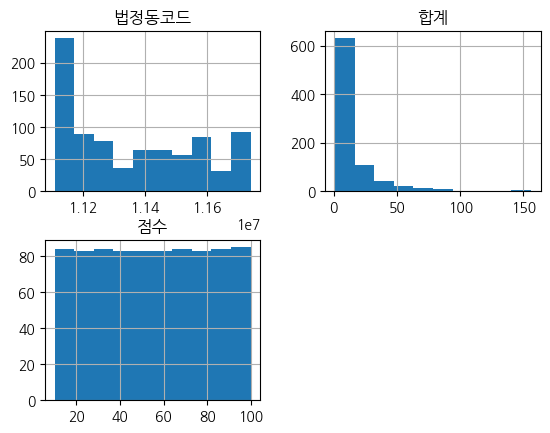

In [227]:
df_fac.hist()
sns.barplot(data = df_fac, x = "구분", y ="합계" )

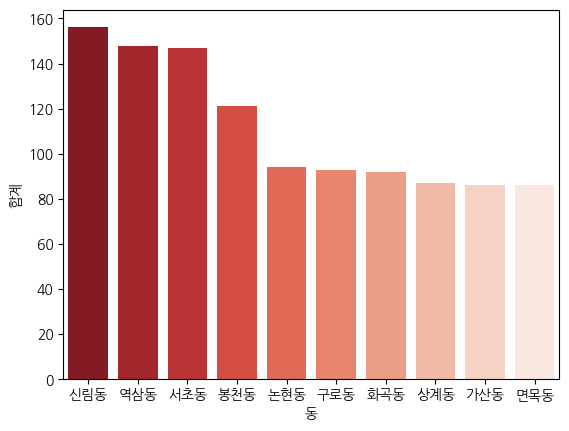

In [240]:
lst = [df_fac_coin, df_fac_pharm, df_fac_store]
for i in lst :
    a =i.sort_values("합계", ascending = False).head(10)
    sns.barplot(data = a, x = "동", y ="합계",palette = "Reds_r")

## 코인세탁 상위 10개 동네

<AxesSubplot:xlabel='동', ylabel='합계'>

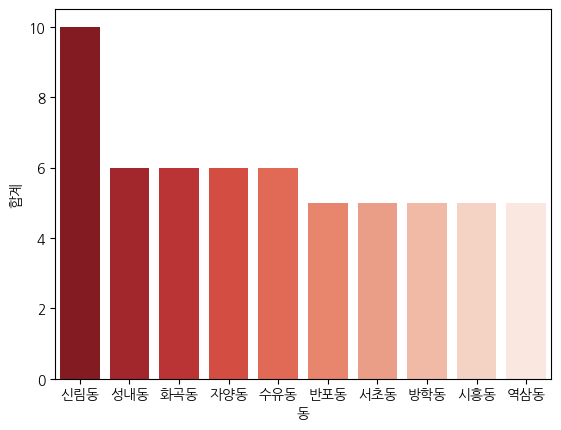

In [244]:

a =df_fac_coin.sort_values("합계", ascending = False).head(10)
sns.barplot(data = a, x = "동", y ="합계",palette = "Reds_r")

## 약국  상위 10개 동네

<AxesSubplot:xlabel='동', ylabel='합계'>

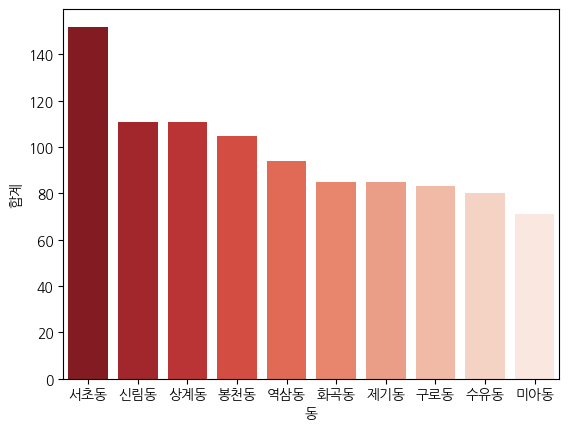

In [245]:
b =df_fac_pharm.sort_values("합계", ascending = False).head(10)
sns.barplot(data = b, x = "동", y ="합계",palette = "Reds_r")

## 편의점 상위 10개 동네

<AxesSubplot:xlabel='동', ylabel='합계'>

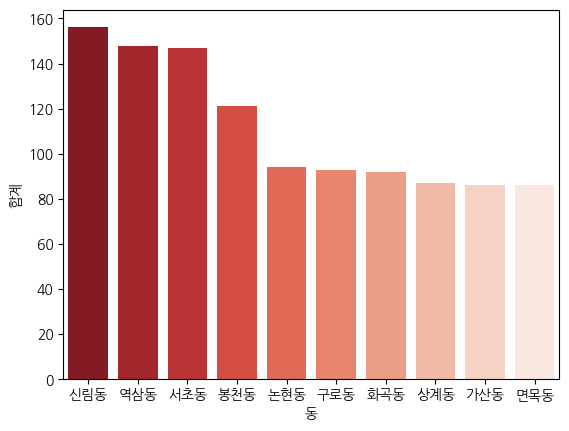

In [247]:
c =df_fac_store.sort_values("합계", ascending = False).head(10)
sns.barplot(data = c, x = "동", y ="합계",palette = "Reds_r")

In [248]:
df_fac.loc[df_fac["동"] == "화양동"]

,구분,법정동코드,자치구,동,합계,점수
28,코인세탁소,11215107.0,광진구,화양동,1.0,50
175,약국,11215107.0,광진구,화양동,9.0,40
515,편의점,11215107.0,광진구,화양동,25.0,80
